In [5]:
# Download all libraries we will use and csv file

import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


df = pd.read_csv('/Users/iliagrishkin/Desktop/movies.csv')
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
# Data cleaning, check on missing data

for col in df.columns:
    missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [7]:
# Data cleaning, check on data types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
df.sort_values(by=['gross'], inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


In [5]:
pd.set_option('display.max_rows', None)

In [10]:
# Data cleaning, check on duplicates

df['company'].drop_duplicates().sort_values(ascending=False).head()

7129                     thefyzz
5664                 micro_scope
6412    iDeal Partners Film Fund
4007                    i5 Films
6793                  i am OTHER
Name: company, dtype: object

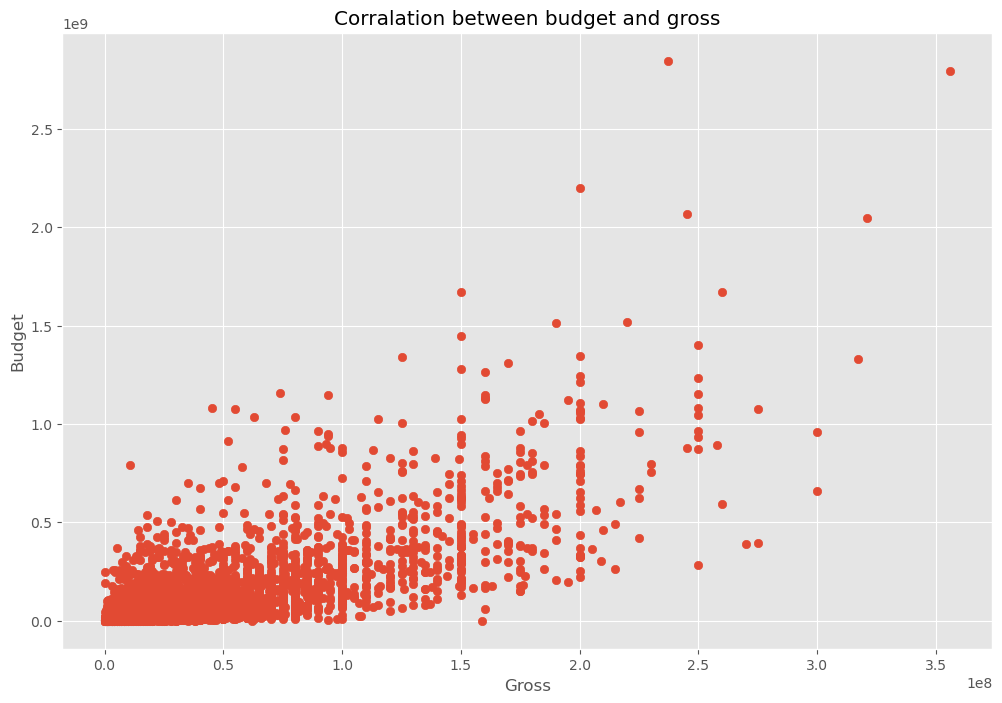

In [10]:
# Data plotting, scatter plot

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Corralation between budget and gross')
plt.xlabel('Gross')
plt.ylabel('Budget')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

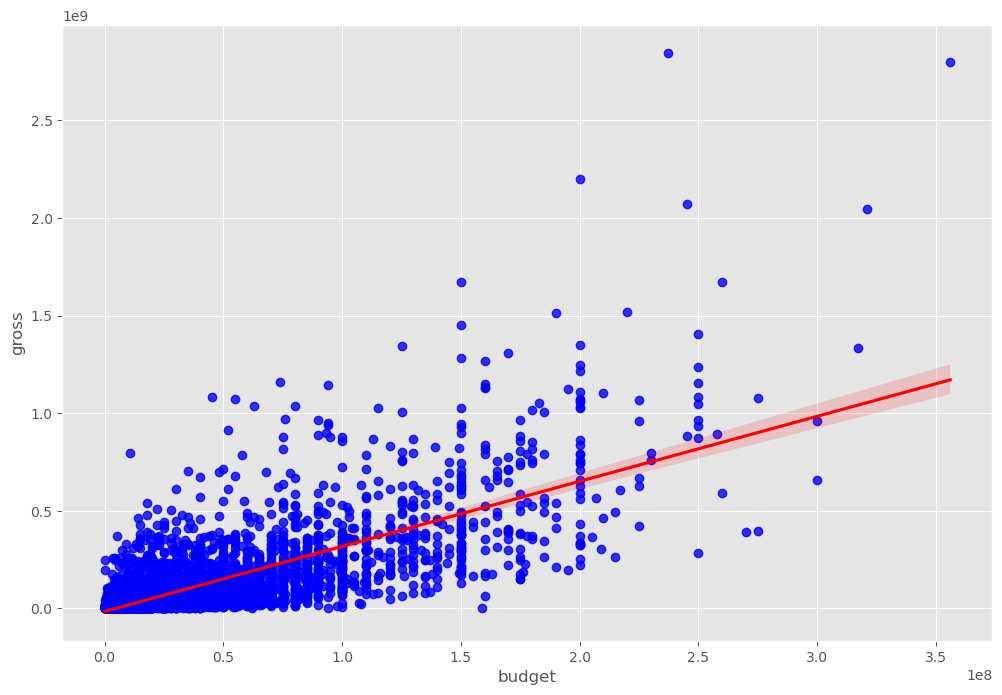

In [12]:
# Data plotting, adding trend line

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": 'blue'}, line_kws={"color": 'red'})

In [13]:
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


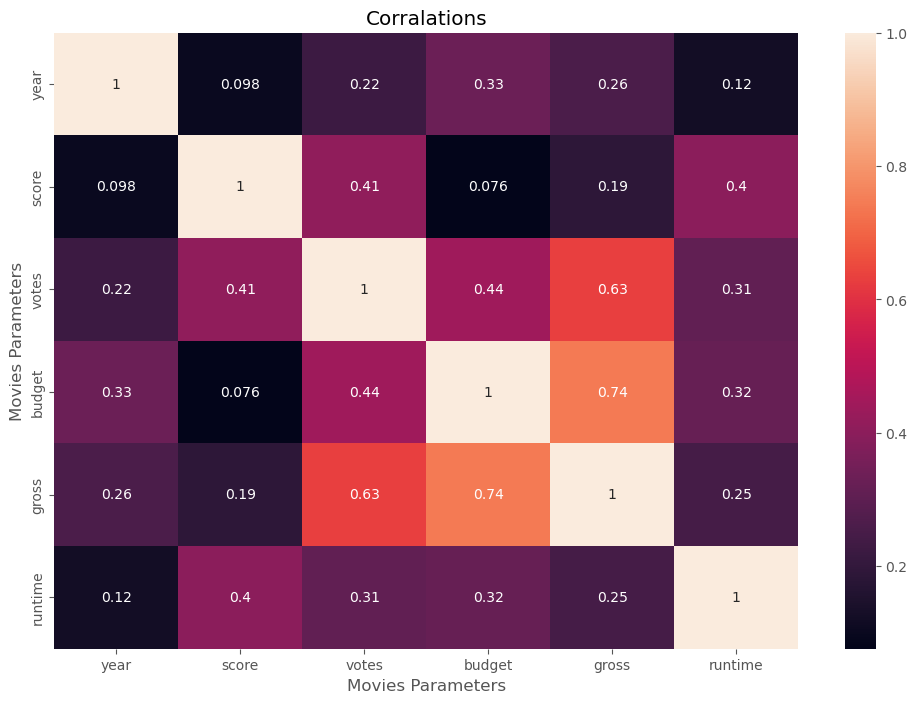

In [16]:
# Data plotting, heatmap

corralation_plot = df.corr(method='pearson')
sns.heatmap(corralation_plot, annot=True)
plt.title('Corralations')
plt.xlabel('Movies Parameters')
plt.ylabel('Movies Parameters')
plt.show()

In [11]:
# Data plotting, converting string element to a number in order to include them in heatmap and investigate correlations 

df_numeralised = df
for col_mane in df_numeralised.columns:
    if (df_numeralised[col_mane].dtype == 'object'):
        df_numeralised[col_mane] = df_numeralised[col_mane].astype('category')
        df_numeralised[col_mane] = df_numeralised[col_mane].cat.codes
        
df_numeralised.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


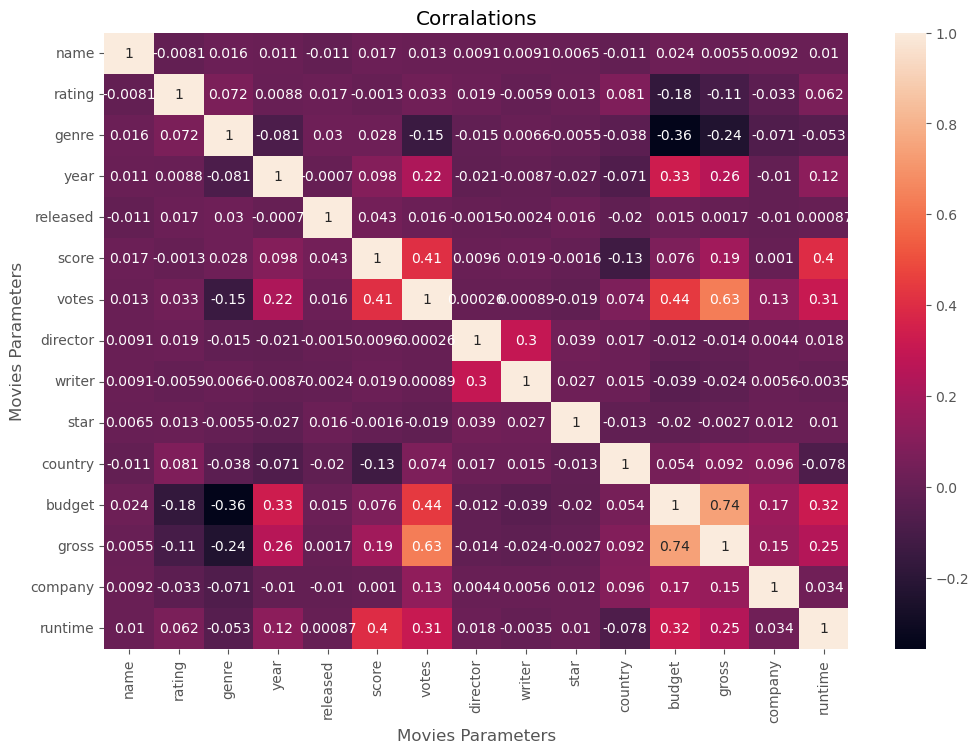

In [21]:
# Data plotting, creating a new heat map

corralation_plot = df_numeralised.corr(method='pearson')
sns.heatmap(corralation_plot, annot=True)
plt.title('Corralations')
plt.xlabel('Movies Parameters')
plt.ylabel('Movies Parameters')
plt.show()

In [12]:
corralation_matrix = df_numeralised.corr()
corralation_pairs = corralation_matrix.unstack()
corralation_pairs.head()

name  name        1.000000
      rating     -0.008069
      genre       0.016355
      year        0.011453
      released   -0.011311
dtype: float64

In [13]:
sorted_pairs = corralation_pairs.sort_values()
sorted_pairs.head()

budget  genre    -0.356564
genre   budget   -0.356564
        gross    -0.235650
gross   genre    -0.235650
rating  budget   -0.176002
dtype: float64

In [26]:
# Extracting the most significant pairs

high_correlation = sorted_pairs[(sorted_pairs) > 0.3]
high_correlation

runtime   votes       0.309212
votes     runtime     0.309212
budget    runtime     0.320447
runtime   budget      0.320447
year      budget      0.329321
budget    year        0.329321
runtime   score       0.399451
score     runtime     0.399451
          votes       0.409182
votes     score       0.409182
budget    votes       0.442429
votes     budget      0.442429
gross     votes       0.630757
votes     gross       0.630757
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64